In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = InteractiveSession(config=config)

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

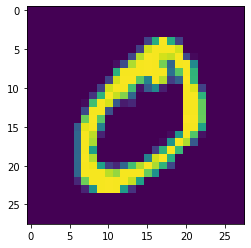

In [4]:
plt.imshow(X_train_full[1])

In [5]:
K = len(set(y_train_full))
K

10

In [6]:
X_train_full = np.expand_dims(X_train_full, -1)/255
X_test = np.expand_dims(X_test,-1)/255

X_train,X_vaild = X_train_full[:-5000], X_train_full[-5000:]
y_train,y_vaild = y_train_full[:-5000], y_train_full[-5000:]

print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape : (55000, 28, 28, 1)
y_train shape : (55000,)


In [7]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
Y_vaild = keras.utils.to_categorical(y_vaild)

In [19]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [16]:
history=model.fit(X_train, Y_train, batch_size=128, epochs=4)

Epoch 1/4
430/430 [==============================] - 2s 5ms/step - loss: 0.2060 - accuracy: 0.9355
Epoch 2/4
430/430 [==============================] - 2s 4ms/step - loss: 0.0537 - accuracy: 0.9830
Epoch 3/4
430/430 [==============================] - 2s 4ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 4/4
430/430 [==============================] - 2s 4ms/step - loss: 0.0261 - accuracy: 0.9916


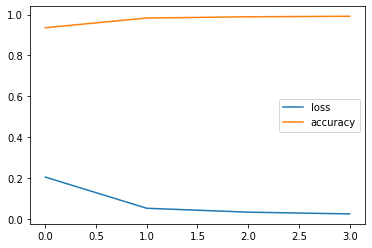

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.show()

# 중간층 시각화

In [23]:
from tensorflow.keras import models

# 상위 8개 층의 출력을 추출합니다:
layer_outputs = [layer.output for layer in model.layers[:8]]
# 입력에 대해 8개 층의 출력을 반환하는 모델을 만듭니다:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [24]:
image=np.expand_dims(X_train_full[4],axis=0)
activations = activation_model.predict(image)

In [25]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 64)


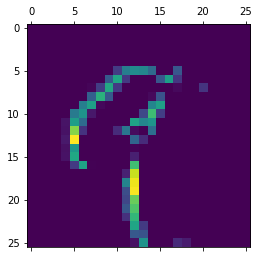

In [31]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

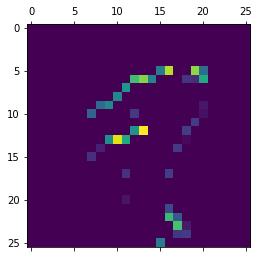

In [32]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

<ipython-input-33-7ee4bc4285b7>:28: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


MemoryError: Unable to allocate 244. GiB for an array with shape (640000, 51200) and data type float64

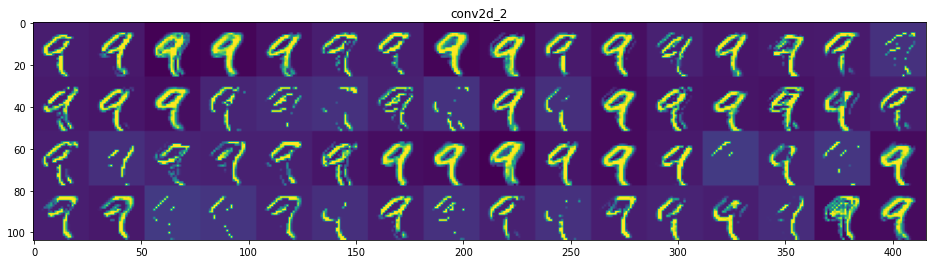

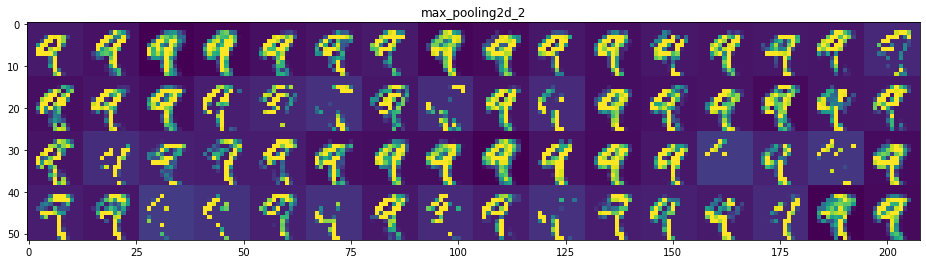

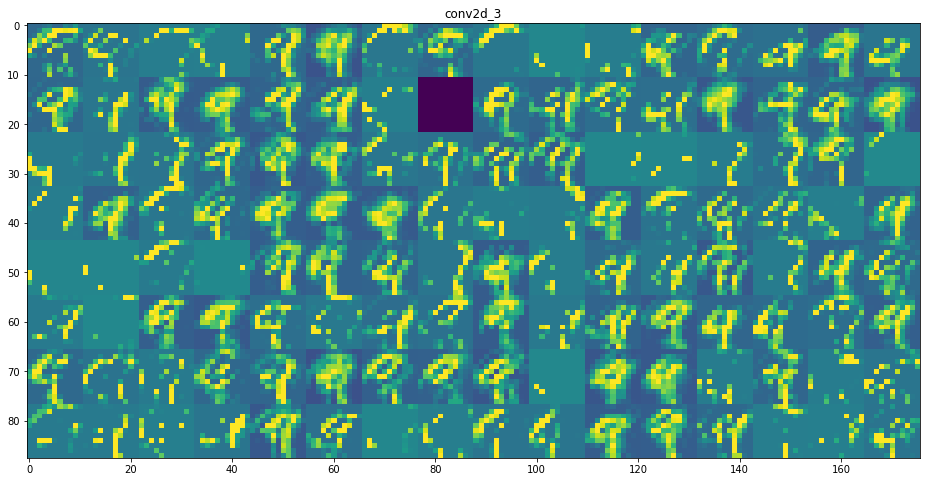

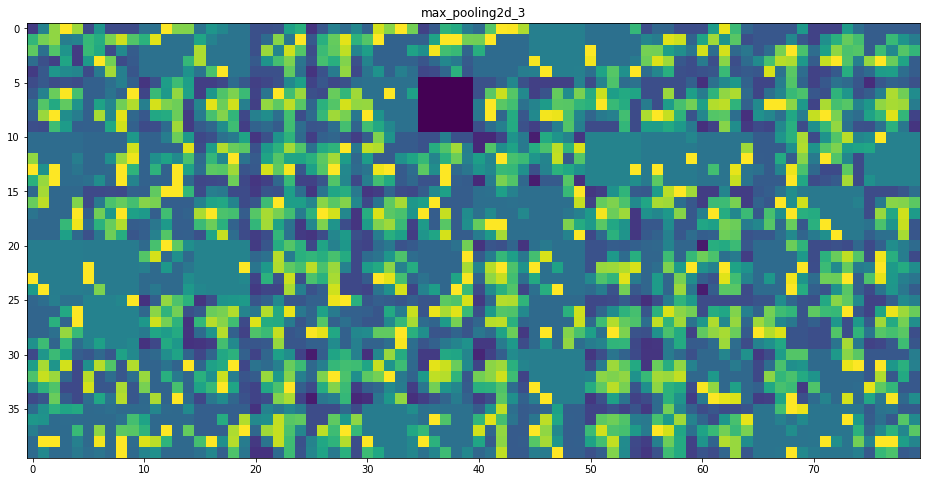

In [33]:
# 층의 이름을 그래프 제목으로 사용합니다
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그립니다
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기는 (1, size, size, n_features)입니다
    size = layer_activation.shape[1]

    # 활성화 채널을 위한 그리드 크기를 구합니다
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

MemoryError: Unable to allocate 244. GiB for an array with shape (640000, 51200) and data type float64

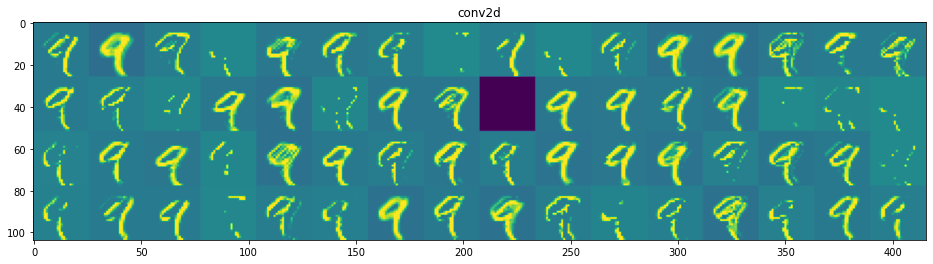

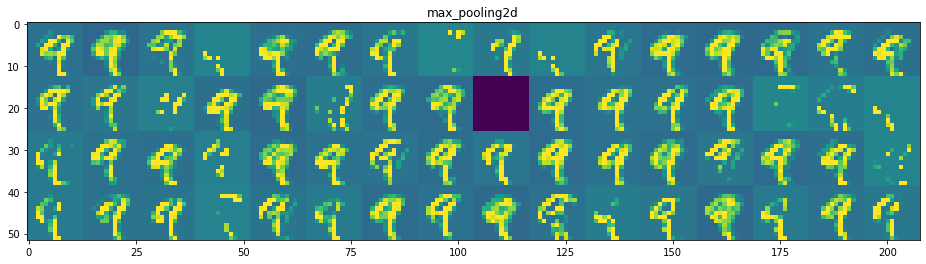

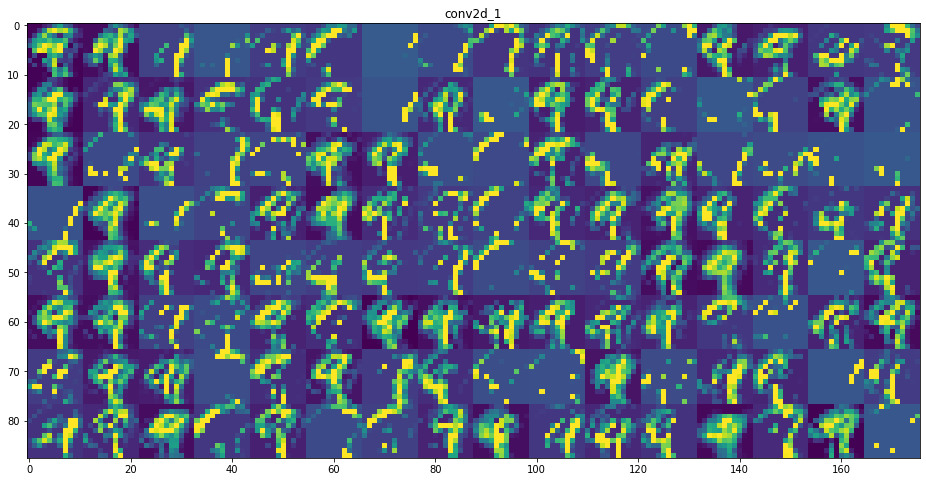

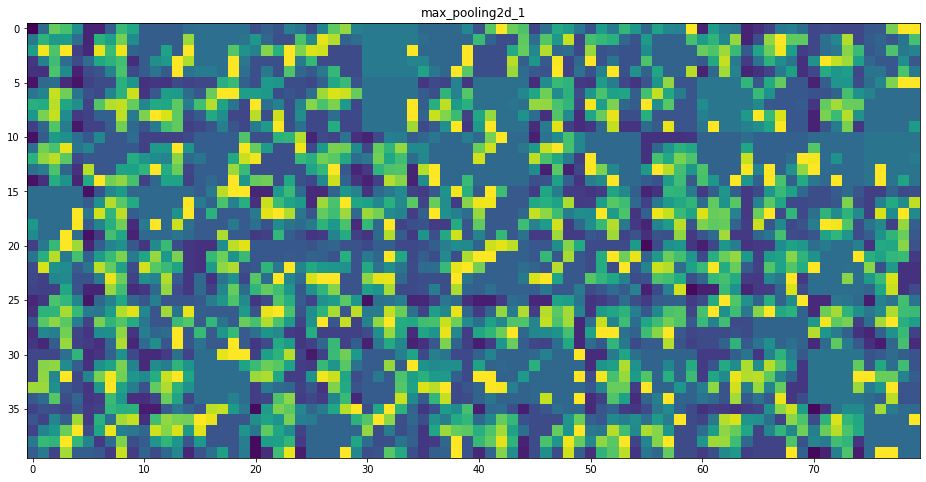

In [18]:
# 층의 이름을 그래프 제목으로 사용합니다
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그립니다
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기는 (1, size, size, n_features)입니다
    size = layer_activation.shape[1]

    # 활성화 채널을 위한 그리드 크기를 구합니다
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

# 경사 상승법
- 잘안됨

In [18]:
from tensorflow.keras import backend as K
layer_name = 'conv2d_1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])ㅣ

SyntaxError: invalid syntax (<ipython-input-18-e801122769d9>, line 6)

In [19]:
with tf.GradientTape() as tape:
    output_of_all_layers = model(model.input)
    preds = layer_output[1]  # last layer is output layer
    # take gradients of last layer with respect to all layers in the model
    grads = tape.gradient(preds, output_of_all_layers)
    # note: grads[-1] should be all 1, since it it d(output)/d(output)
print(grads)

grads = K.gradients(loss, model.input)[0]

NameError: name 'layer_output' is not defined

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

# 밥

In [ ]:
(0.1, 0.2, 0.3, 0.4, 0.5, 0.6)